In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.cm as cm
    
import sys  
sys.path.insert(0, '../src/')

import jsm_halopull
import jsm_prephalo
import jsm_stats
import galhalo
import mcmc_aux

## playing with alpha

In [4]:
alpha_pix = 100
alpha = np.linspace(0.7, 3, alpha_pix)
PDF_mat1 = np.zeros(shape=(alpha_pix, 3129))
PDF_mat2 = np.zeros(shape=(alpha_pix, 3129))

for i in range(alpha_pix):

    models_i = mcmc_aux.satgen_models([i,0,0])
    models_i.get_stats(min_mass=6.5)

    PDF_mat1[i] = models_i.stat.satfreq
    PDF_mat2[i] = models_i.stat.Msmax # just to smooth

In [5]:
def pdf(data):
    return np.histogram(data, bins=np.arange(15), density=True)[0]

In [6]:
hmm = np.apply_along_axis(pdf, 1, PDF_mat1)
hmm.shape

(100, 14)

In [7]:
norm = mpl.colors.Normalize(vmin=alpha.min(), vmax=alpha.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.viridis)

colors = mpl.cm.viridis(np.linspace(0, 1, alpha_pix))

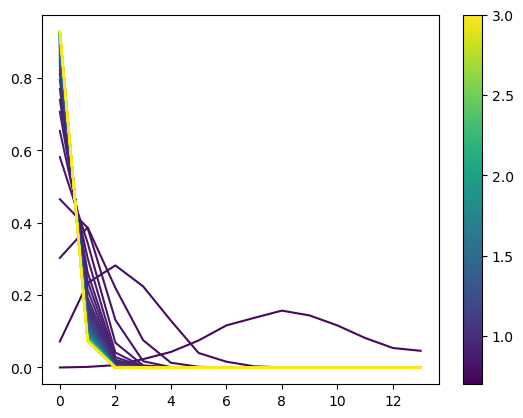

In [8]:
for i in range(alpha_pix):
    plt.plot(np.arange(14), hmm[i], color=colors[i])
plt.colorbar(cmap)

In [ ]:
x1 = np.linspace(0,17,18)
x2 = np.linspace(6,11,18)
halo_masses = np.linspace(8,12,20)

fig, axs = plt.subplots(2, 2, figsize=(16,16))

for i in range(alpha_pix):
    axs[0,0].plot(halo_masses, galhalo.master_SHMR_1D(halo_masses, alpha=alpha[i]), color=colors[i])
    #axs[0,1].plot(stat.mass_bins, CSMF_mat[i], color=colors[i])
    axs[1,0].plot(x1[1:], PDF_mat1[i], color=colors[i])
    axs[1,1].plot(x2[1:], PDF_mat2[i], color=colors[i])

axs[0,0].plot(halo_masses, galhalo.lgMs_RP17(halo_masses), lw=4, color="blue", label="Rodriguez-Puebla et al. 2017")
axs[0,0].set_ylabel("log m$_{*}$ (M$_\odot$)", fontsize=15)
axs[0,0].set_xlabel("log m$_{\mathrm{h}}$ (M$_\odot$)", fontsize=15)
axs[0,0].legend(fontsize=15)
axs[0,0].set_xlim(8,11)
axs[0,0].set_ylim(1,10)


# axs[0,1].plot(stat.mass_bins, real3[1],  lw=4, color="blue")
# axs[0,1].set_ylabel("log N (> m$_{*}$)", fontsize=15)
# axs[0,1].set_xlabel("log m$_{*}$ (M$_\odot$)", fontsize=15)
# axs[0,1].set_yscale("log")
# axs[0,1].set_ylim(0.5, 10**2.1)
# axs[0,1].set_xlim(4, 10)
cb = fig.colorbar(cmap, ax=axs[0,1])


axs[1,0].plot(x1[1:], real1, lw=4, color="blue")
axs[1,0].set_xlabel("number of satellites > $10^{6.5} \mathrm{M_{\odot}}$", fontsize=15)
axs[1,0].set_ylabel("PDF", fontsize=15)
axs[1,0].set_xlim(0,16.4)
axs[1,0].set_ylim(0,.5)


axs[1,1].plot(x2[1:], real2, lw=4, color="blue")
axs[1,1].set_xlabel("stellar mass of most massive satellite ($\mathrm{log\ M_{\odot}}$)", fontsize=15)
axs[1,1].set_ylabel("PDF", fontsize=15)
axs[1,1].set_ylim(0,.21)
plt.show()

In [ ]:
x1 = np.linspace(0,17,18)
x2 = np.linspace(6,11,18)
halo_masses = np.linspace(8,12,20)

fig, axs = plt.subplots(2, 2, figsize=(16,16))

for i in range(alpha_pix):
    axs[0,0].plot(halo_masses, galhalo.master_SHMR_1D(halo_masses, alpha=alpha[i]), color=colors[i])
    #axs[0,1].plot(stat.mass_bins, CSMF_mat[i], color=colors[i])
    axs[1,0].plot(x1[1:], PDF_mat1[i], color=colors[i])
    axs[1,1].plot(x2[1:], PDF_mat2[i], color=colors[i])

axs[0,0].plot(halo_masses, galhalo.lgMs_RP17(halo_masses), lw=4, color="blue", label="Rodriguez-Puebla et al. 2017")
axs[0,0].set_ylabel("log m$_{*}$ (M$_\odot$)", fontsize=15)
axs[0,0].set_ylabel("log m$_{*}$ (M$_\odot$)", fontsize=15)
axs[0,0].set_xlabel("log m$_{\mathrm{h}}$ (M$_\odot$)", fontsize=15)
axs[0,0].legend(fontsize=15)
axs[0,0].set_xlim(8,11)
axs[0,0].set_ylim(1,10)

axs[0,1].plot(stat.mass_bins, real3[1],  lw=4, color="blue")
axs[0,1].fill_between(stat.mass_bins, y1=real3[0], y2=real3[2], alpha=0.2, color="blue", label="5% - 95%")
axs[0,1].set_ylabel("log N (> m$_{*}$)", fontsize=15)
axs[0,1].set_xlabel("log m$_{*}$ (M$_\odot$)", fontsize=15)
axs[0,1].set_yscale("log")
axs[0,1].set_ylim(0.5, 10**2.1)
axs[0,1].set_xlim(4, 10)
cb = fig.colorbar(cmap, ax=axs[0,1])


axs[1,0].plot(x1[1:], real1, lw=4, color="blue")
axs[1,0].set_xlabel("number of satellites > $10^{6.5} \mathrm{M_{\odot}}$", fontsize=15)
axs[1,0].set_ylabel("PDF", fontsize=15)
axs[1,0].set_xlim(0,16.4)
axs[1,0].set_ylim(0,.5)


axs[1,1].plot(x2[1:], real2, lw=4, color="blue")
axs[1,1].set_xlabel("stellar mass of most massive satellite ($\mathrm{log\ M_{\odot}}$)", fontsize=15)
axs[1,1].set_ylabel("PDF", fontsize=15)
axs[1,1].set_ylim(0,.21)
plt.show()